In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/mie1624/final')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler as scaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn 
from sklearn import neighbors

import matplotlib
import matplotlib.pyplot as plt
import re
import pandas as pd 
import numpy as np

import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#data loading and cleaning 

In [0]:
df=pd.read_csv('metadata.csv')

In [0]:
df=df.loc[:,['title','abstract']]

In [0]:
#drop duplicates
df = df.drop_duplicates(subset='abstract', keep="first")

#drop NANs 
df=df.dropna()

# convert abstracts to lowercase
df["abstract"] = df["abstract"].str.lower()

#show 10 lines of the new dataframe
print (df.shape)

#still same with the result provide by TA 

(37531, 2)


In [0]:
df

,title,abstract
0,SIANN: Strain Identification by Alignment to N...,next-generation sequencing is increasingly bei...
1,Spatial epidemiology of networked metapopulati...,an emerging disease is one infectious epidemic...
2,Sequencing of the human IG light chain loci fr...,germline variation at immunoglobulin gene (ig)...
3,Bayesian mixture analysis for metagenomic comm...,deep sequencing of clinical samples is now an ...
4,Mapping a viral phylogeny onto outbreak trees ...,developing methods to reconstruct transmission...
...,...,...
45768,Quality of life and psychological status in su...,abstract background little is known about the ...
45769,Personal Protective Equipment: Protecting Heal...,abstract purpose the recent ebola epidemic tha...
45770,Viruses and asthma,abstract background viral respiratory infectio...
45771,Why the WHO won't use the p-word,"there are no criteria for a pandemic, but covi..."


Problem statement: COVID-19 is dramatically affecting our daily life and it do not have a specific treatment now. We want to find out the relationship between research hotspots. And by analyzing the data we want to give a specific class for different reasearching topic. So if a research group want to join the fighting with virus, the can have a very simple and basic guide what knowledege they need to learn if they want to study in a spesific direction(like t-cell or vaccine)
 

What will we do in this project: in this situation. We choose some possible Buzzword in covid-19 research. And count their word frequency in the whole data. Then we use pca and Kmeans to reduce their dimension and classify them. The result we get is a simple class of different topic. Because all the work we do is on word frequency, it leads to the result that class having more frequency contians more basic information(every work will use it) and shown more in aeticle. and they are also the required knowledge. In the same way, the group having less WF means more specific method or idea in research and if any one want to study in these area.

When doing the kmeans, we use every words as a feature and use how many times the word appear in one article as a feature( one article is one feature ). And finally we get the class, so the result can show the the combine effect of 'whole word frequency' and 'the relation ship between different topic'.


The topic in the same class is quite helpful in providing hints and filling the knowledge gap.

#data prepare (tend the abstract into WF)

In [0]:
#first of all we need to define the keywords for how to prevent
# the symtons we used is from https://www.clinicaltrialsarena.com/analysis/coronavirus-mers-cov-drugs/


In [0]:
keyword=['immun',
 'antibody',
 'aptamer',
 'dna vaccine',
 'globulin',
 'recombinant',
 'spike protein',
 'chloroquine',
 'hydroxychloroquine',
 'cytotoxic',
 'ace2',
 'vaccine',
 'monoclonal',
 'b-cell','antigen',
 'b cell',
 't-cell',
 'receptors', 
 't cell','trimeric','influenza']

In [0]:
def countkeyword(x):
    countlist=[]    
    for i in keyword:
        countlist.append(x.count(i))
    return(countlist)

In [0]:
dfsymtoms=pd.DataFrame(columns=keyword)
#dfsymtoms.columns=keyword
dfsymtoms['title']=df['title']

In [0]:
for k in range(dfsymtoms.shape[0]):
  dfsymtoms.iloc[k,:-1]=countkeyword(str(df.iloc[k,-1]))

dfsymtoms=dfsymtoms.drop(columns=['title'])
dfsymtoms['Col_sum'] = dfsymtoms.apply(lambda x: x.sum(), axis=1)


In [0]:
dfff=dfsymtoms.loc[dfsymtoms['Col_sum']!=0]

dfff['b cell']=dfff['b cell']+dfff['b-cell']
dfff=dfff.drop(columns=['b-cell'],axis=1)
dfff['t cell']=dfff['t cell']+dfff['t-cell']
dfff=dfff.drop(columns=['t-cell'],axis=1)

dfff=dfff.drop(columns=['Col_sum'])
listtt=[]
for i in dfff.columns:
  a=sum(dfff[i])
  listtt.append(a)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#data explore analysis

first we want to make a bar pic to show how many article cover an exact topic

In [0]:
dfbar=dfff.copy()
dfbar[dfbar>0]=1

numlist=[]
for i in dfbar.columns:
  a=sum(dfbar[i])
  numlist.append(a)

In [0]:
numlist
for i in range(len(numlist)):
  a=100*numlist[i]/(dfbar.shape[0])
  numlist[i]=a

Text(0.5, 1.0, 'how much percentage of article includes this word')

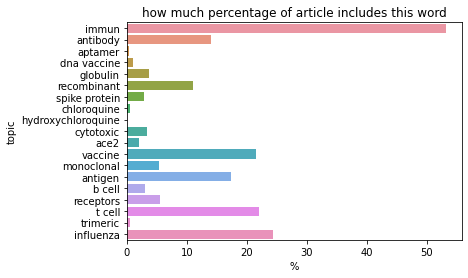

In [0]:
sns.barplot(y=dfff.columns.tolist(),x=numlist)
plt.xlabel('%')
plt.ylabel('topic')
plt.title('how much percentage of article includes this word')


then we will see the corelationship between different topic

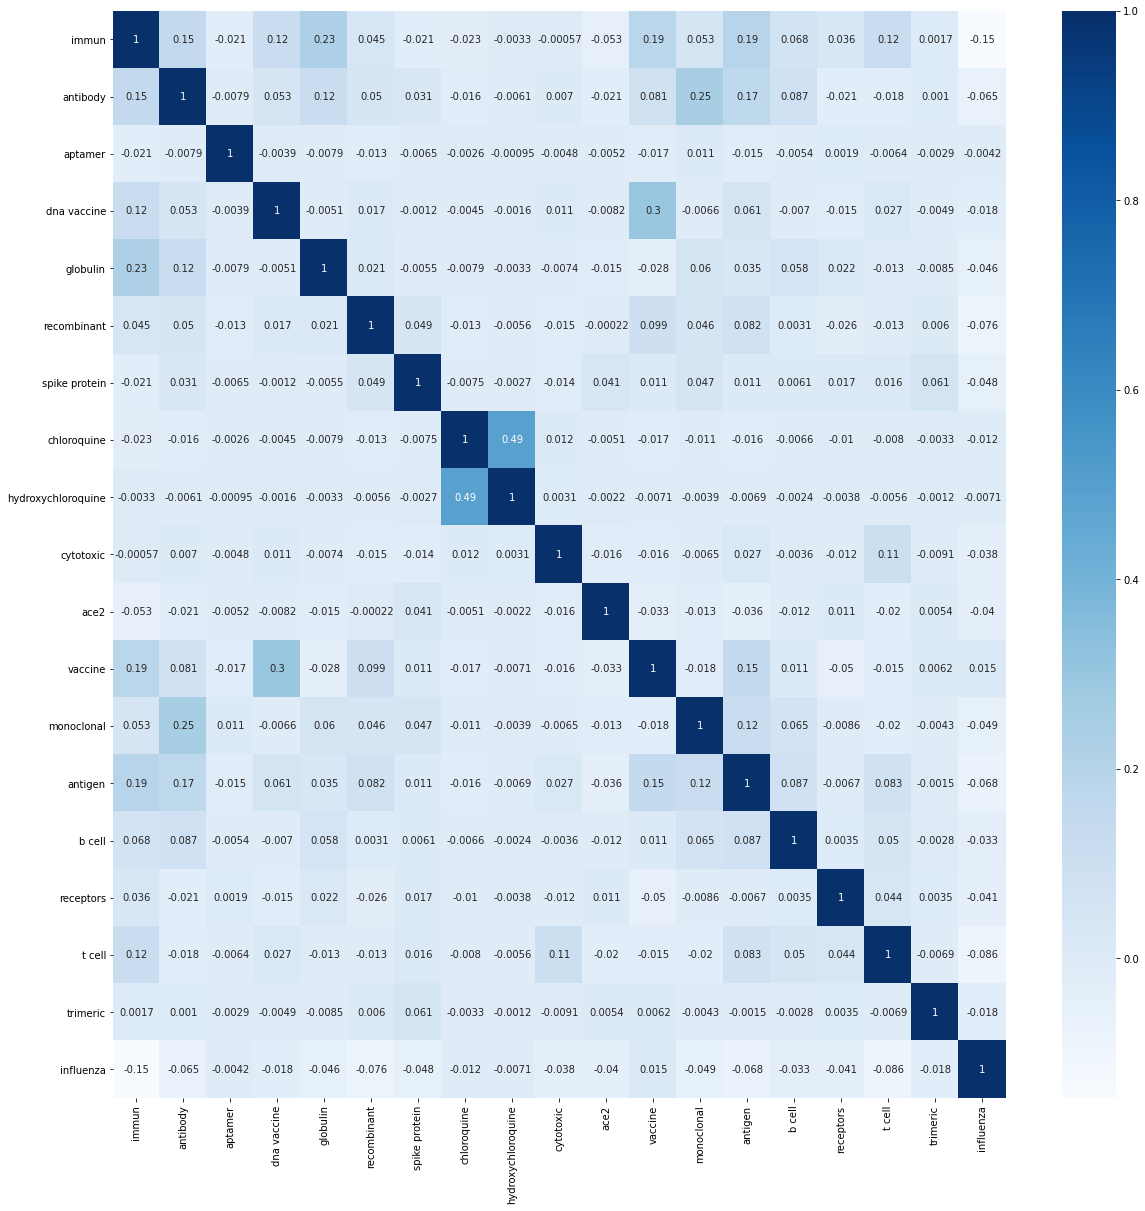

In [0]:
import seaborn as sns
dfheatmap=dfff.astype(float)
corr = dfheatmap.corr()


plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap='Blues', annot=True)

In [0]:
len(dfff.columns.tolist())

19

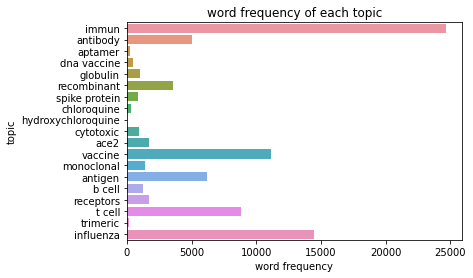

In [0]:
sns.barplot(y=dfff.columns.tolist(),x=listtt)
plt.xlabel('word frequency')
plt.ylabel('topic')
plt.title('word frequency of each topic')

plt.show()
#too much Ib but in order to see other keyword clearly we need to remove it temporarily

In [0]:
a=dfff.columns.tolist()
#ib=a.index('ib')
#a.remove('ib')
b=listtt
#b.remove(b[15])


# use machine learning method on our data 

we want to class the topic so we have to use the features( or topic ) in original dataframe as samples while the samples in df as features. Then do the pca to reduce the dimention.

In [0]:
A=dfff.values
dfkmeans=pd.DataFrame(A.T)

In [0]:
dfkmeans.index=dfff.columns

we need to use pca first to reduce the dimension of the data set then we can use kmeans to do the cluster job we wonder.

we don't split the dataframe into train and test because it is just for cluster and we do not need to valid how well the model work.

In [0]:
#we need to normolize the data first 
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(dfkmeans)

dfkmeans=pd.DataFrame(X)
dfkmeans.index=dfff.columns


In [0]:
#now we use pca 
from sklearn.decomposition import PCA

#for pca when i=7 the PCs hold 95% information 

In [0]:
pca = PCA(n_components=3)
pca.fit(X)
sum(pca.explained_variance_ratio_)

0.6369420537648036

In [0]:
#还是用词频的形式完成这一段工作
#我的目的是首先统计各种症状的数目，其次相关性 
#以及最后各种解决方式
#将症状和措施 用ML 方法对应起来


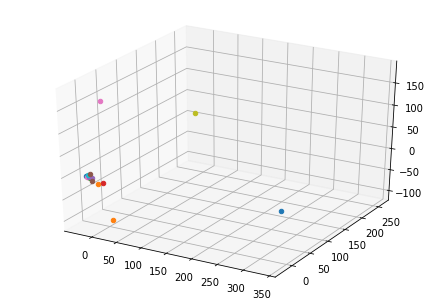

In [0]:
#before use k means we need to define the k we need to visualize the data first to see the distribution 
pca = PCA(n_components=3)
X1=pca.fit_transform(X)


fig = plt.figure()
ax = Axes3D(fig)
for i in range(X1.shape[0]):
  ax.scatter(X1[i,0],X1[i,1],X1[i,2])

plt.show()

In [0]:
#in this picture we can see that there are about 6-7 clusters in the data 

###kmeans

In [0]:
from sklearn.cluster import KMeans
SSE = []  
for i in range(2,20):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X1)
  SSE.append(kmeans.inertia_)

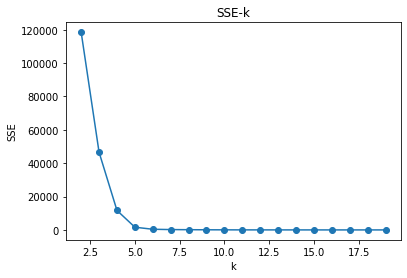

In [0]:
ilist = range(2,20)
plt.xlabel('k')
plt.title('SSE-k')
plt.ylabel('SSE')
plt.plot(ilist,SSE,'o-')
plt.show()

by the above fig we can see that k=5 is the best k for the kmeans model.

but in this case k=5 is not the best answer of this model. due to the 3D fig we print above we can see that there is clearly at least 3 cluster. The reason causing the difference of observation and SSE method is that compared with other 4  cluster, the 2 clusters in the left-down conor of the fig are too close(however we still can identify them from each other). Kmeans is an algrithm based on distance and when we apply kmeans on the data , it will consider the two cluster as a single one.

so here we choose k=6 and k=7 to make up the problem mentioned before.

In [0]:
#now we apply on it and see the samples in each culster
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X1)
kmeans.labels_

array([2, 0, 3, 3, 6, 6, 3, 3, 3, 3, 3, 5, 6, 0, 3, 3, 4, 3, 1],
      dtype=int32)

In [0]:
dfcount=pd.DataFrame()
dfcount['kmeanslabel']=kmeans.labels_
dfcount.index=dfff.columns
#dfcount['topic']=dfcount.index.tolist()
#dfcount=dfcount.sort_values(by=['label'])


,kmeanslabel
immun,2
antibody,0
aptamer,3
dna vaccine,3
globulin,6
recombinant,6
spike protein,3
chloroquine,3
hydroxychloroquine,3
cytotoxic,3


###Mixture gaussian

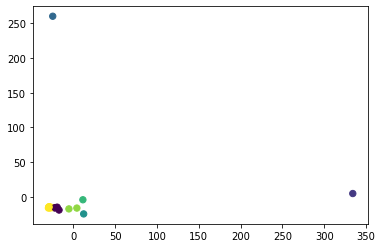

In [0]:
import numpy as np
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=7)
GMM.fit(X1)
labels = GMM.predict(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis');


In [0]:
dfcount['GMMlabels']=labels

###AgglomerativeClustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
clustering=AgglomerativeClustering(n_clusters=7)

clustering.fit(X1)

clustering.labels_

array([3, 2, 0, 0, 6, 6, 0, 0, 0, 0, 0, 4, 6, 2, 0, 0, 1, 0, 5])

In [0]:
dfcount['AC']=clustering.labels_

###make 3 algrithm and then combine them together

In [0]:
dfcount=dfcount.sort_values(by=['kmeanslabel'])

In [0]:
dfcount['GMMlabels'].unique()
dictgmm={5:0, 2:1, 1:2, 6:3, 0:4, 3:5, 4:6}
dfcount['GMMlabels']=dfcount['GMMlabels'].map(dictgmm)

In [0]:
dfcount['AC'].unique()
dictac={2:0, 5:1, 3:2, 0:3, 1:4, 4:5, 6:6}
dfcount['AC']=dfcount['AC'].map(dictac)

In [0]:
dfcount

,kmeanslabel,GMMlabels,AC
antibody,0,0,0
antigen,0,0,0
influenza,1,1,1
immun,2,2,2
cytotoxic,3,3,3
dna vaccine,3,3,3
receptors,3,4,3
b cell,3,3,3
aptamer,3,3,3
trimeric,3,3,3


the result is exactly the same except the topic "receptor". But according to the principle "Minority obeys majority" , we choos the majority.

#result and what can this project tell us

In [0]:
for i in range(0,7):
  dfsub=dfcount.loc[dfcount['label']==i]
  print(dfsub['topic'].unique())

['antibody' 'antigen']
['influenza']
['immun']
['spike protein' 'chloroquine' 'hydroxychloroquine' 'trimeric' 'ace2'
 'aptamer' 'b cell' 'receptors' 'dna vaccine' 'cytotoxic']
['t cell']
['vaccine']
['globulin' 'recombinant' 'monoclonal']


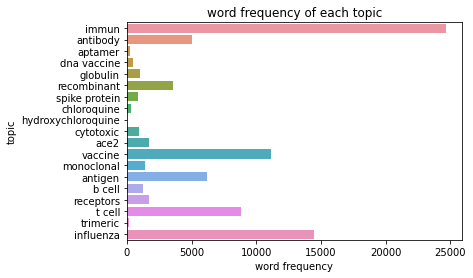

In [0]:
sns.barplot(y=dfff.columns.tolist(),x=listtt)
plt.xlabel('word frequency')
plt.ylabel('topic')
plt.title('word frequency of each topic')

plt.show()

First of all, we put an eye on topic 'immune','influenza'，‘t cell’ and 'vaccine'. These 4 topic own a single class and have largest word frequency as shown in the pic in step2(data explore), which means this 4 topics is relatively basic. For any one who want to study in the covid-19 need to learn this area. 


Secondly, the class ['antibody','antigen'], they are a pair of noun in Immunology. For the research group who want to study in Immunotherapy， this class can provide a hint. For the class ['globulin' 'recombinant' 'monoclonal'], all the topic in it have a great relationship with vaccine.( some is a specific kind of vaccine or how to produce the vaccine) For the research group who want to study in vaccine, perhaps they can foucus on these specific topics.

Finally the last class ['spike protein' 'chloroquine' 'hydroxychloroquine' 'trimeric' 'ace2' 'aptamer' 'b cell' 'receptors' 'dna vaccine' 'cytotoxic'] contains specific topic about how to solve the question . If all the requiement knowledge is ready, the researchers can pick up one topic in this class and do some deeper work.